In [1]:
#!pip install xgboost

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor as rfr
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor as dtr
from xgboost import XGBRFRegressor
import warnings

In [3]:
warnings.simplefilter('ignore')

In [4]:
ins = pd.read_csv('insurance.csv')

In [5]:
ins

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [6]:
ins.isnull().sum()
ins.info()
ins.drop_duplicates(inplace = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
ins.duplicated().sum()

0

<Figure size 6000x3000 with 0 Axes>

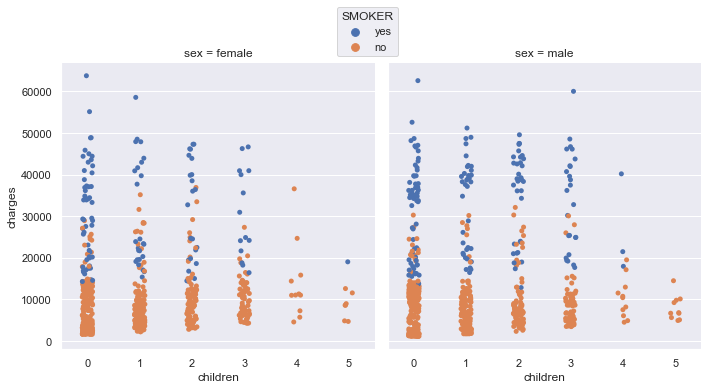

In [8]:
plt.figure(figsize = (20,10), dpi = 300)
sns.set()
sns.catplot(data = ins, x = 'children',y = 'charges', hue = 'smoker', col = 'sex', legend = False)
plt.tight_layout()
plt.legend(title = 'SMOKER', bbox_to_anchor = [0.05,1.215])

In [9]:
ins.corr()['charges'].sort_values()

children    0.067389
bmi         0.198401
age         0.298308
charges     1.000000
Name: charges, dtype: float64

<AxesSubplot:xlabel='age', ylabel='charges'>

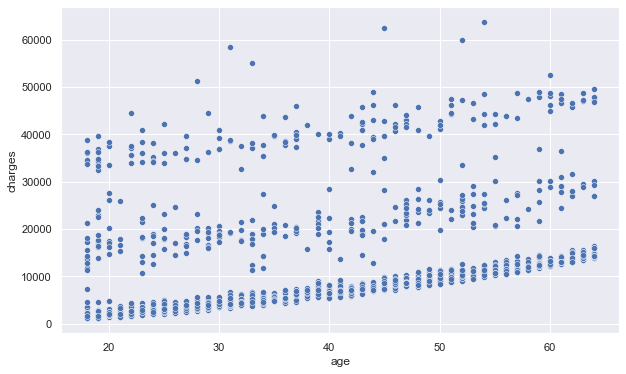

In [10]:
plt.figure(figsize = (10,6))
sns.set()
sns.scatterplot(data = ins, x = 'age',y = 'charges')

In [11]:
ins_objs = ins.select_dtypes(include = object)
ins_nums = ins.select_dtypes(exclude = object)

In [12]:
ins_objs = pd.get_dummies(ins_objs, drop_first = True)

In [13]:
ins_final2 = pd.concat([ins_nums,ins_objs], axis = 1)

In [14]:
X = ins_final2.drop(['charges'], axis = 1)

In [15]:
y = ins_final2['charges']

In [16]:
acc = []
for j in range(0,102):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state =j)
    scale = StandardScaler()
    train_scale = scale.fit_transform(X_train)
    test_scale = scale.transform(X_test)
    model_lin = LinearRegression()
    model_lin.fit(train_scale, y_train)
    model_random = rfr()
    model_random.fit(train_scale, y_train)
    model_tree =dtr()
    model_tree.fit(train_scale, y_train)
    model_xgboost = XGBRFRegressor()
    model_xgboost.fit(train_scale, y_train)
    predict_lin = model_lin.predict(test_scale)
    predict_random = model_random.predict(test_scale)
    predict_xgboost = model_xgboost.predict(test_scale)
    predict_tree = model_tree.predict(test_scale)
    score_lin = r2_score(y_test, predict_lin)*100
    score_random = r2_score(y_test, predict_random)*100
    score_xgboost = r2_score(y_test, predict_xgboost)*100
    score_tree = r2_score(y_test, predict_tree)*100
    acc.append([score_lin, score_random, score_xgboost, score_tree])

In [17]:
new = pd.DataFrame(acc, columns = ['score_lin', 'score_random', 'score_xgboost', 'score_tree'])
new = new[(new['score_lin'] > 80) & (new['score_random'] > 85) & (new['score_xgboost'] > 85) & (new['score_tree'] > 70)]
new = new.sort_values(by = 'score_random', ascending = False)
new

,score_lin,score_random,score_xgboost,score_tree
50,80.131082,90.396237,91.770555,77.972374
42,80.692871,87.806660,89.833330,81.770544
59,80.325459,86.181145,88.372958,77.231422
86,81.196907,85.559630,88.726941,70.483532


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [19]:
scale = StandardScaler()
train_scale = scale.fit_transform(X_train)
test_scale = scale.transform(X_test)

In [20]:
model_lin = LinearRegression()
model_lin.fit(train_scale, y_train)

LinearRegression()

In [21]:
model_random = rfr()
model_random.fit(train_scale, y_train)

RandomForestRegressor()

In [22]:
model_tree =dtr()
model_tree.fit(train_scale, y_train)

DecisionTreeRegressor()

In [23]:
model_xgboost = XGBRFRegressor()
model_xgboost.fit(train_scale, y_train)

XGBRFRegressor(base_score=0.5, booster='gbtree', callbacks=None,
               colsample_bylevel=1, colsample_bytree=1,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
               importance_type=None, interaction_constraints='', max_bin=256,
               max_cat_to_onehot=4, max_delta_step=0, max_depth=6, max_leaves=0,
               min_child_weight=1, missing=nan, monotone_constraints='()',
               n_estimators=100, n_jobs=0, num_parallel_tree=100,
               objective='reg:squarederror', predictor='auto', random_state=0,
               reg_alpha=0, sampling_method='uniform', scale_pos_weight=1, ...)

In [24]:
model_svr = SVR()
model_svr.fit(train_scale, y_train)

SVR()

In [25]:
predict_lin = model_lin.predict(test_scale)

In [26]:
predict_random = model_random.predict(test_scale)

In [27]:
predict_xgboost = model_xgboost.predict(test_scale)

In [28]:
predict_tree = model_tree.predict(test_scale)

In [29]:
predict_svr = model_svr.predict(test_scale)

In [30]:
score_lin = r2_score(y_test, predict_lin)*100
score_abs_lin = mean_absolute_error(y_test, predict_lin)
score_mean_lin = mean_squared_error(y_test,predict_lin)

In [31]:
score_random = r2_score(y_test, predict_random)*100
score_abs_random = mean_absolute_error(y_test, predict_random)
score_mean_random = np.sqrt(mean_squared_error(y_test, predict_random))

In [32]:
score_xgboost = r2_score(y_test, predict_xgboost)*100
score_abs_xgboost= mean_absolute_error(y_test, predict_xgboost)
score_mean_xgboost = np.sqrt(mean_squared_error(y_test, predict_xgboost))

In [33]:
score_tree = r2_score(y_test, predict_tree)*100
score_abs_tree = mean_absolute_error(y_test, predict_tree)
score_mean_tree = np.sqrt(mean_squared_error(y_test, predict_tree))

In [34]:
score_svr = r2_score(y_test, predict_svr)*100
score_abs_svr = mean_absolute_error(y_test, predict_svr)
score_mean_svr = np.sqrt(mean_squared_error(y_test, predict_svr))

In [35]:
scores = {'Models': ['LinearRegression', 'RandomForestRegressor', 'xgboostRegressor', 'DecisionTreeRegressor', 'svr'],
          'Acuracy Scores': [score_lin, score_random, score_xgboost, score_tree, score_svr],
          'Absolute error': [score_abs_lin, score_abs_random, score_abs_xgboost, score_abs_tree, score_abs_svr],
          'Root Mean Squared error': [score_mean_lin, score_mean_random, score_mean_xgboost, score_mean_tree, score_mean_svr]}

In [36]:
ins_acc = pd.DataFrame(scores)

In [37]:
ins_acc['Root Mean Squared error'] = round(ins_acc['Root Mean Squared error'], 1)

In [38]:
ins_acc

,Models,Acuracy Scores,Absolute error,Root Mean Squared error
0,LinearRegression,80.692871,4177.045561,35478020.7
1,RandomForestRegressor,87.879791,2669.129316,4719.3
2,xgboostRegressor,89.833330,2448.427560,4322.3
3,DecisionTreeRegressor,80.463449,2759.005043,5991.6
4,svr,-13.116125,9264.975876,14417.3


In [39]:
compare_lin = pd.DataFrame({'Actual_values': y_test , 'Predicted_linreg' : predict_lin,
                            'Predicted_randomreg':predict_random,
                            'Predicted_treereg':predict_tree,
                            'Predicted_xgboost':predict_xgboost,
                            'Predicted_svr': predict_svr})

In [40]:
compare_lin

,Actual_values,Predicted_linreg,Predicted_randomreg,Predicted_treereg,Predicted_xgboost,Predicted_svr
900,8688.85885,8143.693884,9145.580688,9361.32680,10558.062500,9286.563847
1064,5708.86700,5737.115683,9780.611673,6059.17300,7194.158691,9276.158711
1256,11436.73815,14369.314876,11904.393868,10848.13430,11703.583984,9306.534186
298,38746.35510,31745.513636,43517.363967,40932.42950,40996.406250,9321.429161
237,4463.20510,8962.386657,5934.882259,4673.39220,5933.131836,9257.363524
...,...,...,...,...,...,...
534,13831.11520,16753.406458,14250.908779,14901.51670,14046.392578,9322.595304
542,13887.20400,15274.565769,14186.043153,13981.85035,14116.856445,9323.937014
760,3925.75820,6454.699355,8086.563807,3987.92600,7527.036133,9240.240075
1284,47403.88000,38467.156720,47801.914969,48517.56315,47629.750000,9347.853566


In [41]:
model_tree.predict(scale.transform([[28,33.000,3,1,0,0,1,0]]))

array([4449.462])

In [42]:
ins_final2

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,1,0,0
1334,18,31.920,0,2205.98080,0,0,0,0,0
1335,18,36.850,0,1629.83350,0,0,0,1,0
1336,21,25.800,0,2007.94500,0,0,0,0,1


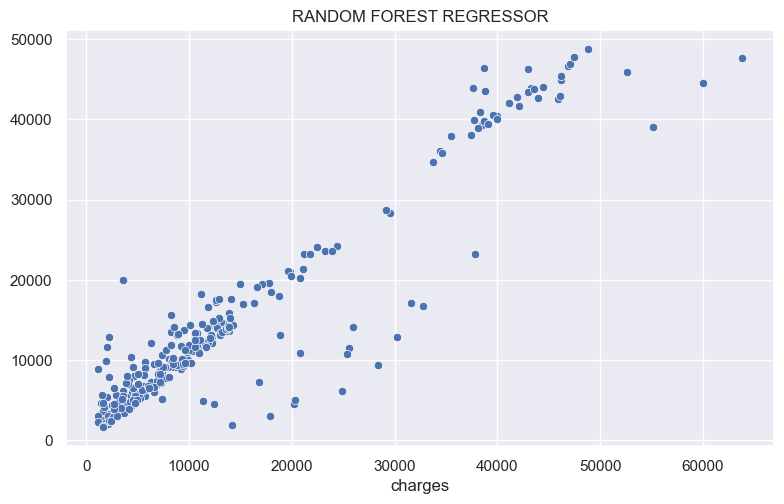

In [43]:
plt.figure(figsize = (8,5), dpi = 100)
sns.set()
sns.scatterplot(x = y_test ,y =predict_random )
plt.tight_layout()
plt.title('RANDOM FOREST REGRESSOR');

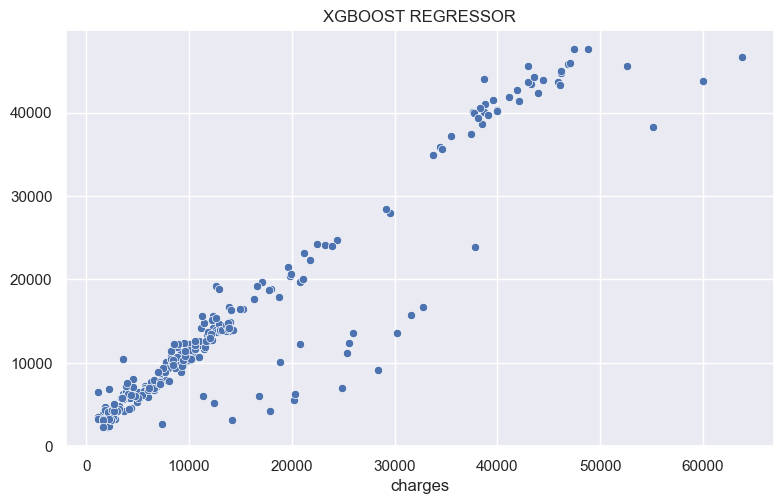

In [44]:
plt.figure(figsize = (8,5), dpi = 100)
sns.set()
sns.scatterplot(x = y_test ,y =predict_xgboost )
plt.tight_layout()
plt.title('XGBOOST REGRESSOR');

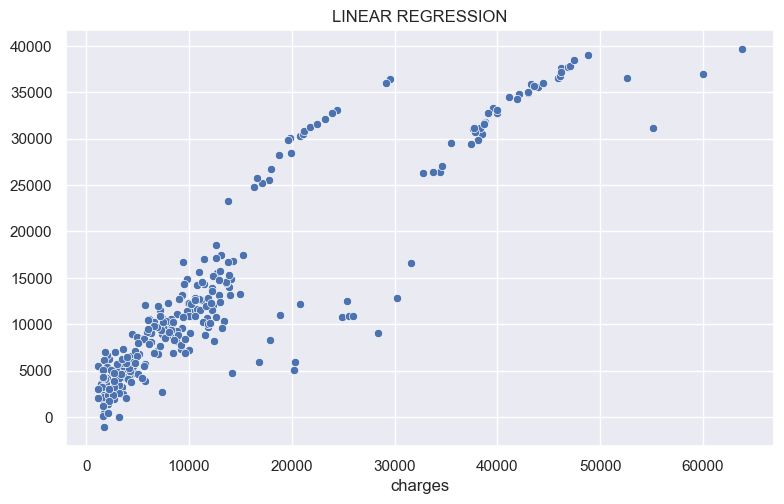

In [45]:
plt.figure(figsize = (8,5), dpi = 100)
sns.set()
sns.scatterplot(x = y_test ,y =predict_lin)
plt.tight_layout()
plt.title('LINEAR REGRESSION');

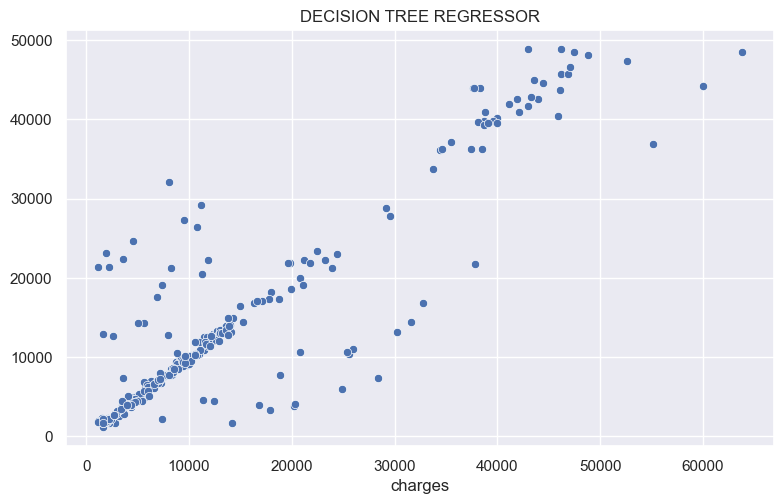

In [46]:
plt.figure(figsize = (8,5), dpi = 100)
sns.set()
sns.scatterplot(x = y_test ,y =predict_tree)
plt.tight_layout()
plt.title('DECISION TREE REGRESSOR');